# Support Vector Machine From First Principles

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## This code implements SVM with no ML packages. The following block of code is the alogrithm using the OOP paradigm. 

In [83]:
# build the class for the model
class model:
    
    # parameters
    def __init__(self, alpha, reg, epochs):
        
        self.alpha = alpha      #learning rate
        self.reg = reg          # regularization param
        self.epochs = epochs  # number of iterations
        self.w = None           # weights  
        self.b = None           # biases
        
    # the algorithm
    def fit(self, X, y):
        
        m, n = X.shape    # m -> examples, n -> no. of features

        # creating subset array for where: 
        # wx + b <= 0   -> y == -1 and 1 otherwise
        y_ = np.where(y <= 0, -1, 1)

        # initialise weights and biases
        self.w = np.zeros(n)
        self.b = 0

        # machine learning part
        for _ in range(self.epochs):
            
            for i, x_i in enumerate(X):
                
                # satisfy the condition to update the weights and bias
                if y_[i] * (np.dot(x_i, self.w) - self.b) >= 1:
                    self.w = self.w - self.alpha * (2 * self.reg * self.w) # loss = 0, J = lambda*w^2
                    
                else:
                    # J = lambda*w^2 + 1 - y_i(w . x_i  - b) 
                    self.w = self.w - self.alpha * (2 * self.reg * self.w - np.dot(x_i, y_[i]))
                    self.b = self.b - self.alpha * y_[i]

    # predictions                
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)
    
    # accuracy method
    def accuracy(self,y,predictions):
        
        counter = 0
        
        for i in range(len(y)):
            if predictions[i] == y[i]:
                counter += 1
            
        return print('The accuracy is:', (counter/len(y))*100, '%')

## Acquiring Data, Plotting and Accuracy of the Model 

The accuracy is: 100.0 %


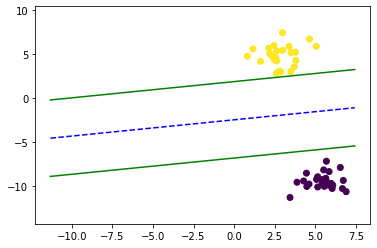

In [91]:
# Testing and training the model

# generate the data with two clusters
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1, random_state=10)
y = np.where(y <= 0, -1, 1)

# apply the class to the data to train our model and generate predictions
svm = model(alpha=0.01,reg=0.1,epochs=1000)
svm.fit(X, y)
predictions = svm.predict(X)

# report the accuracy
svm.accuracy(y,predictions)

# function to plot the line and its margin
def plotSVM():
    
    # value on the hyperplane
    def hyperplane(X, w, b, offset):
        return (-w[0] * X + b + offset) / w[1]

    # plot the two classes
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_min = np.min(X[:, 0])
    x0_max = np.max(X[:, 0])

    # line when wx - b = 0
    x1_1 = hyperplane(x0_min, svm.w, svm.b, 0)
    x1_2 = hyperplane(x0_max, svm.w, svm.b, 0)

    # support vector when wx - b = -1
    x1_neg = hyperplane(x0_min, svm.w, svm.b, -1)
    x2_neg = hyperplane(x0_max, svm.w, svm.b, -1)

    # support vector when wx - b = +1
    x1_pos = hyperplane(x0_min, svm.w, svm.b, 1)
    x2_pos = hyperplane(x0_max, svm.w, svm.b, 1)

    plt.plot([x0_min, x0_max], [x1_1, x1_2], "b--")
    plt.plot([x0_min, x0_max], [x1_neg, x2_neg], "g")
    plt.plot([x0_min, x0_max], [x1_pos, x2_pos], "g")

    x1_min = np.min(X[:, 1])
    x1_max = np.max(X[:, 1])
    plt.ylim([x1_min - 3, x1_max + 3])

    plt.show()

#plot the data    
plotSVM()

## The above code can be simply implemented using SKlearn

In [100]:
# import packages
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
# generate the data with two clusters
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1, random_state=10)

In [102]:
# split and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
# accuracy and confusion matrix
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

